In [1]:
# importing libraries  
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
  
data_set= pd.read_csv("C:/Sefkan/Social_Network_Ads.csv")   

In [2]:
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  

In [3]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [4]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)  

In [5]:
 from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

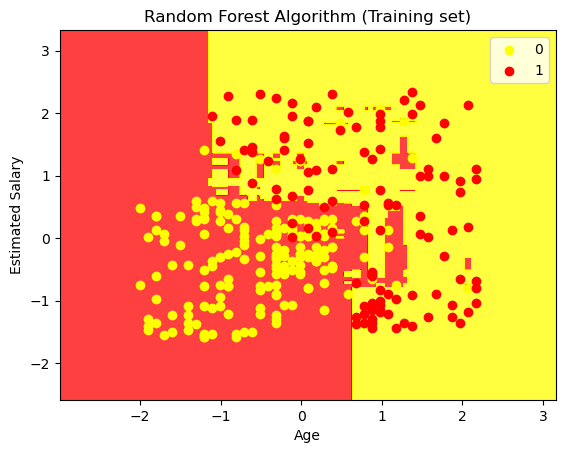

In [6]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(("red",'yellow' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        color = ListedColormap(("yellow","red"))(i), label = j)  
plt.title("Random Forest Algorithm (Training set)")  
plt.xlabel("Age")  
plt.ylabel("Estimated Salary")  
plt.legend()  
plt.show()

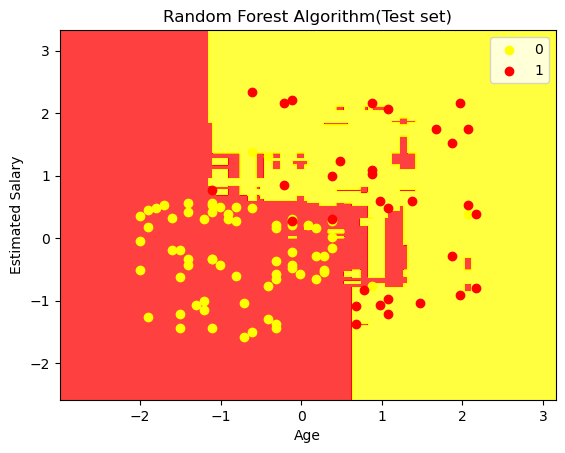

In [7]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(("red","yellow" )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        color = ListedColormap(("yellow","red"))(i), label = j)  
plt.title("Random Forest Algorithm(Test set)")  
plt.xlabel("Age")  
plt.ylabel("Estimated Salary")  
plt.legend()  
plt.show()  